##### Loan performance in association with borrowers and lenders.

##### Investigation overview

In this investigation, we look at borrowers and how various variables affect loan performance.

##### Dataset overview
The prosper loan dataset is a financial dataset. Prosper is an American company that offers loans at low interest rates to the borrowers. The dataset is comprised of 81 variables and contains 113937 entries. We looked at Term, Borrower rate, Stated monthly income, loan original amount, Prosper rating, Employment Status and Estimated returns

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#load the dataset
df = pd.read_csv('prosperLoanData.csv')

#shape of data
df.shape

#columns of data
df.info()

#first 5 rows
df.head(5)

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


##### Distribution of Estimated return
> > The feature of Estimated return appears to have a range of -18%-28%. The distribution is skewed to the right. The quartiles lie from 7%, 9& and 11%.

Text(0.5, 1.0, 'Distribution of Estimated return')

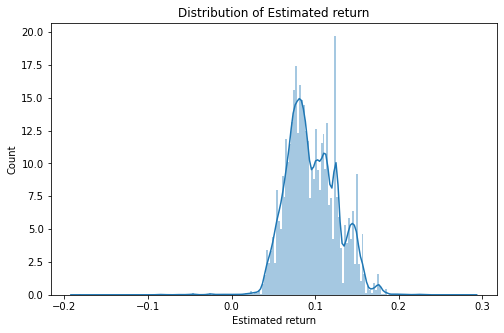

In [3]:
#desription of employment status
df['EstimatedReturn'].describe()

#description of estimated returns
df['EstimatedReturn'].isna().sum()

#drop null
df['EstimatedReturn'].dropna(axis = 0, inplace = True)

#histogram plot
plt.figure(figsize = [8,5])
sb.distplot(df.EstimatedReturn, bins = 200)
plt.xlabel('Estimated return')
plt.ylabel('Count')
plt.title('Distribution of Estimated return')

##### Distribution of prosper rating
 The ProsperRating (Alpha) merged with CreditGrade produces ProsperRatingMerged. The most frequent rating is C. The distribution is skewed to the right.

Text(0.5, 1.0, 'Distribution of Prosper rating')

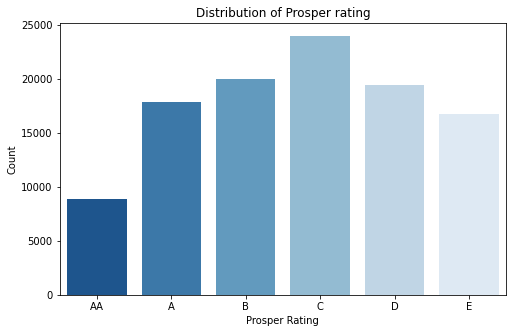

In [4]:
#prosper rating description
df['ProsperRating (Alpha)'].describe()

#credit grade description
df['CreditGrade'].describe()

#merge NC and HR
df['CreditGrade'].replace(['NC', 'HR'], 'E', inplace=True)

#handle null values
df['CreditGrade'].fillna("", inplace=True)
df['ProsperRating (Alpha)'].fillna("", inplace=True)

#merge credit ratings
df['ProsperRatingMerged'] = df['ProsperRating (Alpha)'] + df['CreditGrade']

#drop rows
df = df.query('ProsperRatingMerged != ""')

#value count
df['ProsperRatingMerged'].value_counts()

df['ProsperRatingMerged'].describe()

#convert to ordinal type
ordinal_rates = ['AA', 'A', 'B', 'C', 'D', 'E']
ordered_ordinal = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_rates)
df['ProsperRatingMerged'] = df['ProsperRatingMerged'].astype(ordered_ordinal)

#countplot
plt.figure(figsize=[8,5])
sb.countplot(data = df, x = 'ProsperRatingMerged', palette='Blues_r')
plt.xlabel('Prosper Rating')
plt.ylabel('Count')
plt.title('Distribution of Prosper rating')

In [5]:
#categorical & numeric variables
categorical_variables = ['ProsperRatingMerged', 'EmploymentStatus']
numeric_variables = ['Term', 'BorrowerRate', 'StatedMonthlyIncome', 'EstimatedReturn', 'LoanOriginalAmount']

##### Employment status and ProsperRating
From the boxplots, we can see that the people who are self-employed have a the highest range of estimated return, while people who are retired have the lowest estimated return. 

The estimated return increase with a better prosper rating.

We can speculate that people who are self-employed have higher cash flows to repay their loans while people who are retired have stopped working and don't have consistent incomes.

Text(0.5, 0.98, 'Estimated Return vs Employment Status & Prosper Rating')

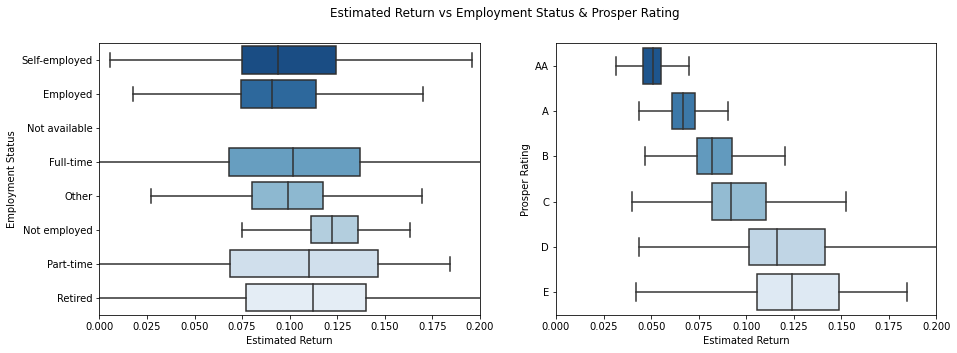

In [12]:
#boxplot
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
base_color = sb.color_palette()[0]
sb.boxplot(data=df, y='EmploymentStatus', x='EstimatedReturn', palette='Blues_r',showfliers=False)
plt.xlim(0,.2)
plt.ylabel('Employment Status')
plt.xlabel('Estimated Return')

plt.subplot(1,2,2)
base_color = sb.color_palette()[0]
sb.boxplot(data = df, y='ProsperRatingMerged', x='EstimatedReturn', palette='Blues_r',showfliers=False)
plt.xlim(0,.2)
plt.ylabel('Prosper Rating')
plt.xlabel('Estimated Return')

plt.suptitle('Estimated Return vs Employment Status & Prosper Rating')

##### Employment Status and Borrower Rate
From the boxplots, we can observe that self-employed people have the highest borrower rate followed by employed people and the retired people have the lowest borrower rate.

The prosper rating increases with higher borrower rate.

We can speculate that because self-employed people have high borrower rate that they have higher prosper ratings. 

<AxesSubplot: xlabel='BorrowerRate', ylabel='ProsperRatingMerged'>

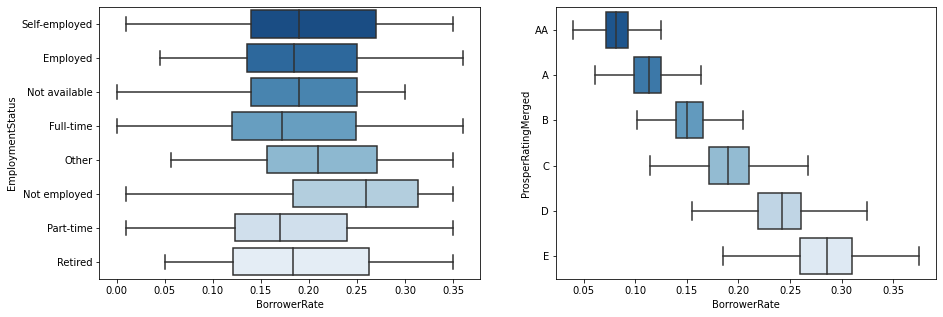

In [8]:
#boxplots
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
base_color=sb.color_palette()[0]
sb.boxplot(data=df, y='EmploymentStatus', x='BorrowerRate', palette='Blues_r', showfliers = False)

plt.subplot(1,2,2)
base_color= sb.color_palette()[0]
sb.boxplot(data=df, y='ProsperRatingMerged', x='BorrowerRate', palette='Blues_r',showfliers=False)

##### Employment Status effect on prosper rating
From the chart above, we can see that employed people make the most people who take loans. Most of the employed people have a rating of C. They also have the most members with a ratong of AA followed by Full time and Self-employed. 

This would make sense because employed people have a consistent income, lenders are guranteed that the loans taken by employed people will be paid. 

Text(0, 0.5, 'Employment Status')

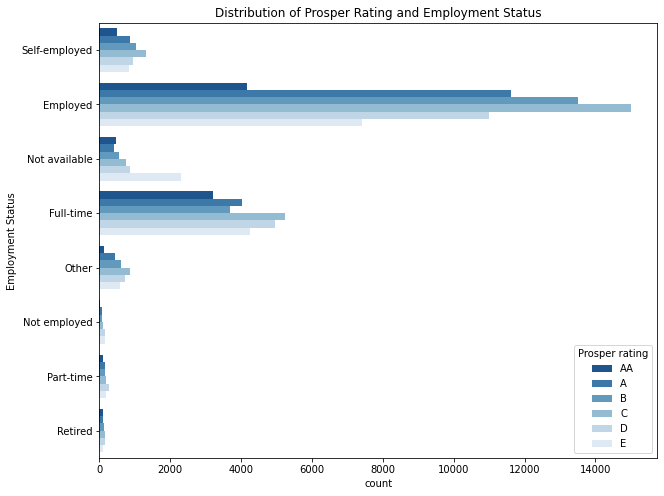

In [9]:
plt.figure(figsize=[10,8])

ax = sb.countplot(data=df, y='EmploymentStatus', hue='ProsperRatingMerged', palette='Blues_r')
ax.legend(title='Prosper rating')
plt.title('Distribution of Prosper Rating and Employment Status')
plt.ylabel('Employment Status')

##### Relationship between Employment status, Prosper rating and Estimated returns
From the heat map we see that Employed people are still dominating in numbers. Employed people still lie in the worse prosper ratings despite having among the highest estimated returns.

Another trend we can observe from the chart above is that, People who work full time have the highest estimated return despite having the worst prosper rating.

Despite what we have observed earlier, retired people has the least amount of people taking loans but they have the highest estimated return and have the worst prosper rating. 

Another observation from the chart, retired people have the highest return in the AA rating while people who are not employed have the highest return in the A category. 

In the B category people who are not employed also have the highest estimated return, while people who work full time have the highest return in the C category.

Text(0.5, 1.0, 'Heatmap of Estimated returns Medians vs Prosper Raring and Employment Status')

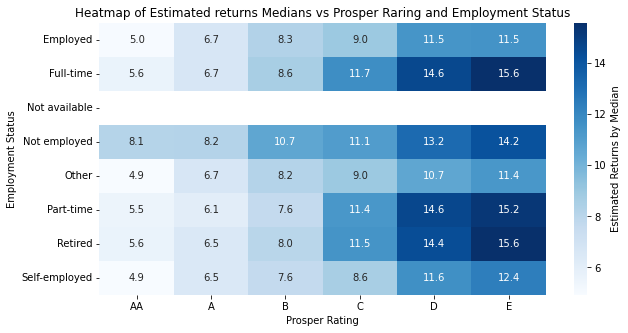

In [10]:
#heat map
plt.figure(figsize = [10,5])

m_exp = df.groupby(['ProsperRatingMerged', 'EmploymentStatus']).median()['EstimatedReturn']*100
m_exp = m_exp.reset_index(name='EstimatedReturnMedian')
m_exp = m_exp.pivot(index = 'EmploymentStatus', columns = 'ProsperRatingMerged', values = 'EstimatedReturnMedian')

sb.heatmap(m_exp, annot=True, fmt='.1f', cmap='Blues', cbar_kws={'label':'Estimated Returns by Median'})
plt.xlabel('Prosper Rating')
plt.ylabel('Employment Status')
plt.title('Heatmap of Estimated returns Medians vs Prosper Raring and Employment Status')

In [3]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 736877 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\ProgramData\A